Итоги:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=50k, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50k, out_features=50k, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50k, out_features=10, bias=True)
  )
)
- от 100 до 600
Малое количество "нейронов" в модели дает весь посредственный результат, 
как в процессе обучения(между эпохами) так и конечный результат не превышает 80%
- 5к 1 минута, 5 эпох, 80%
- 10k 3 минуты, 1 эпоха, точность 73% 
- выше (50к) привожит к очень долгой сборке(инициализации) модели и еще более долгому обучению:
примерно 10 минут для того, чтобы просто обойти 10k примеров!
Прохождение 1-й эпохи занимает, примерно, 60 минут при 82% точности

In [1]:
from torch import *
import torch.nn as nn
from torch.nn import Sequential
import torch.optim
import torchvision.transforms as transforms
import torchvision
from collections import OrderedDict

import numpy as np
# отрисовка изображений
import matplotlib.pyplot as plt 
from PIL import Image

# модуль для построения графиков
import pylab

import time
%matplotlib inline

In [2]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layers = nn.Sequential(OrderedDict([
            ('fc1', nn.Linear(2, 2, bias=0)),
            ('output', nn.Linear(2, 1, bias=0))
        ]))

    def forward(self, x):
        return self.layers(x)   

In [3]:
# тут я занимался какой-то хренью...
model = Model()
print(f"w1: {model.layers[0].weight}")
print(f"w2: {model.layers[1].weight}")

w1 = 0.42
w2 = 0.15
w3 = -0.56
w4 = 0.83
w5 = 0.93
w6 = 0.02
# change weights model
with torch.no_grad():
    model.layers[0].weight[0, 0] = w1
    model.layers[0].weight[0, 1] = w2
    model.layers[0].weight[1, 0] = w3
    model.layers[0].weight[1, 1] = w4
    model.layers[1].weight[0, 0] = w5
    model.layers[1].weight[0, 1] = w6

print("after changed weights(hard code)")
print(f"w1: {model.layers[0].weight}")
print(f"w2: {model.layers[1].weight}")

x1 = 7.2
x2 = -5.8
input_x = np.expand_dims(np.array([x1, x2]), 0)
print(input_x)
print(f"shape: {input_x.shape}")

x_rand = torch.tensor(input_x)
x_rand = x_rand.to(torch.float32)
x_rand
predict = model.forward(x_rand)
print(f"predict: {predict}")

H1 = x1*w1 + x2*w2
H2 = x1*w3 + x2*w4
print(f"H1: {H1}")
print(f"H2: {H2}")

Y_linear = H1*w5 + H2*w6
print(f"Y_linear: {Y_linear}")

w1: Parameter containing:
tensor([[ 0.3757, -0.4641],
        [ 0.2395, -0.4083]], requires_grad=True)
w2: Parameter containing:
tensor([[ 0.1828, -0.2077]], requires_grad=True)
after changed weights(hard code)
w1: Parameter containing:
tensor([[ 0.4200,  0.1500],
        [-0.5600,  0.8300]], requires_grad=True)
w2: Parameter containing:
tensor([[0.9300, 0.0200]], requires_grad=True)
[[ 7.2 -5.8]]
shape: (1, 2)
predict: tensor([[1.8263]], grad_fn=<MmBackward0>)
H1: 2.154
H2: -8.846
Y_linear: 1.8263000000000003


first element: (<PIL.Image.Image image mode=L size=28x28 at 0x2276C08E310>, 5)
show the image: AxesImage(shape=(28, 28))


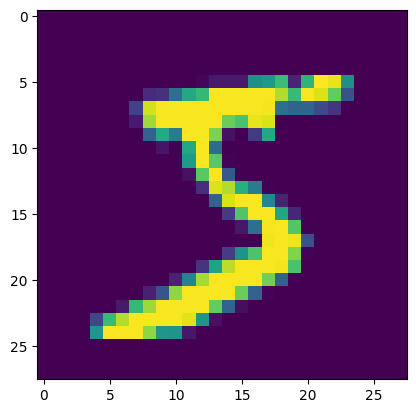

In [4]:
train_mnist = torchvision.datasets.MNIST('../../Data/mnist/train', train=True, transform=None, download=True)
test_mnist = torchvision.datasets.MNIST('../../Data/mnist/test', train=False, transform=None, download=True)

print(f"first element: {train_mnist[0]}")
image = np.asarray(train_mnist[0][0])

print(f"show the image: {plt.imshow(image)}")

In [5]:
# переводим картинку в тензор
train_mnist = torchvision.datasets.MNIST("../../Data/mnist/train", train=True, transform=transforms.Compose([transforms.ToTensor()]), download=0)
test_mnist = torchvision.datasets.MNIST("../../Data/mnist/train", train=False, transform=transforms.Compose([transforms.ToTensor()]), download=0)

print(f"first element(after transform to tensor): {train_mnist[0]}")

first element(after transform to tensor): (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.00

our image: AxesImage(shape=(28, 28))
number is: 4


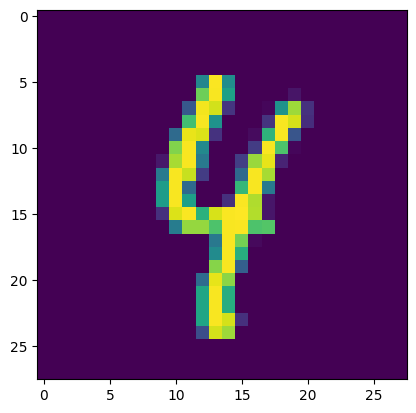

In [6]:
# делил датасет по batch(сколько за раз пример модель при обучении)
train_mnist_tensor = torch.utils.data.DataLoader(dataset=train_mnist, batch_size=100, shuffle=1)
test_mnist_tensor = torch.utils.data.DataLoader(dataset=test_mnist, batch_size=100, shuffle=0)

# посмотрим чего там внутри
train_features, train_labels = next(iter(train_mnist_tensor))
print(f"our image: {plt.imshow(train_features[0].squeeze())}")
print(f"number is: {train_labels[0]}")

In [7]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [8]:
# Клепаем нейроночку
first_line = 1000
second_line = 500
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # 28*28 ибо размер картинки 28*28!
            nn.Linear(28*28, first_line),
            nn.ReLU(),
            nn.Linear(first_line, second_line),        
            nn.ReLU(),
            nn.Dropout(p=0.4),
            # выход 10, ибо цифр 10(0-9)!
            nn.Linear(second_line, 10),
            nn.Softmax(),
            nn.Dropout(p=0.2)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits    

In [9]:
model = NeuralNetwork().to(device)
# Так и чего тут у модели внутри интересного есть?
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=500, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.4, inplace=False)
    (5): Linear(in_features=500, out_features=10, bias=True)
    (6): Softmax(dim=None)
    (7): Dropout(p=0.2, inplace=False)
  )
)


In [10]:
# loss function and optimazer
loss_fn = nn.CrossEntropyLoss()
optimazer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [11]:
# метод для обучения модели
def train(dataloader, model, loss_fn, optimazer):
    size = len(dataloader.dataset)
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error(считаем на сколько модель ошибается)
        prediction = model(X)
        loss = loss_fn(prediction, y)

        # Backpropagation
        loss.backward()
        optimazer.step()
        optimazer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [12]:
# проверка модели на тестовых данных
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    # отключает разные штуки(dropout, batch normalize etc) которые нужны при обучении, но не после
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            prediction = model(X)
            test_loss += loss_fn(prediction, y).item()
            correct += (prediction.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")            

In [13]:
# Объединяем все, определяемся с кол. эпох и в путь
epochs = 1

start_time = time.time()
for e in torch.arange(0, epochs):
    print(f"Epoch {e + 1}\n-----------------------------")
    train(train_mnist_tensor, model, loss_fn, optimazer)
    test(test_mnist_tensor, model, loss_fn)
print("Done!")
print(f"Spend time: {(time.time() - start_time):.4f} seconds")
print(f"Spend time: {(time.time() - start_time)/60:.4f} minutes")

Epoch 1
-----------------------------


loss: 2.303139 [  100/60000]


c:\git\Learning_ML\.venv\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


loss: 1.649762 [10100/60000]
loss: 1.587716 [20100/60000]
loss: 1.537705 [30100/60000]
loss: 1.491742 [40100/60000]
loss: 1.499589 [50100/60000]
Test Error: 
 Accuracy: 94.2%, Avg loss: 1.520150

Done!
Spend time: 18.9029 seconds
Spend time: 0.3150 minutes


In [14]:
# проверка обученной модели на тестовых данных
def accuracy(output, labels):
    predictions = torch.argmax(output, dim=1)
    correct = (predictions == labels).sum().cpu().numpy()
    return correct / len(labels)

model.eval()
with torch.no_grad():
    accuracy_list = []
    for itr, data in enumerate(test_mnist_tensor):
        imgs = data[0].to(device)
        labels = data[1].to(device)
        imgs = imgs.view(-1, 28*28)
        y_pred = model.forward(imgs)    
        accuracy_list.append(accuracy(y_pred, labels))

print("Test accuracy - {:.2f}".format(np.sum(accuracy_list) / len(accuracy_list)))

Test accuracy - 0.94


In [15]:
# Сохранение модели в отдельный файл
# torch.save(model.state_dict(), "model.pth")
# print("Saved PyTorch Model State to model.pth")

In [16]:
# Загрузка модели из файла
# model = NeuralNetwork().to(device)
# model.load_state_dict(torch.load("model.pth"))

In [43]:
model.eval()
num = 5
x, y = test_mnist[num][0], test_mnist[num][1]

with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = pred[0].argmax(0), y
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "1", Actual: "1"


torch.Size([1, 28, 28])
tensor([[3.1179e-23, 8.2931e-25, 7.4854e-18, 1.0000e+00, 3.8077e-32, 1.2298e-09,
         2.4953e-29, 1.3576e-21, 2.9608e-15, 6.9424e-19]])


c:\git\Learning_ML\.venv\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor(3)

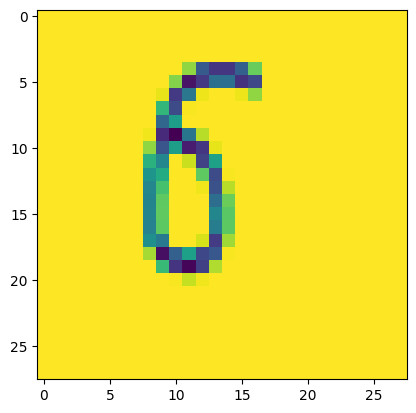

In [45]:
img = Image.open("../../Data/two.png")
img = img.resize((28, 28))
# img = img.convert("1")
img = img.convert("L")
# img = img.convert("RGBA")
plt.imshow(img)


convert_tensor = transforms.ToTensor()
img = convert_tensor(img)
# torch.Size([1, 28, 28])
img = img.reshape(img.shape[0],28,28,)
print(img.shape)
img = img.to(device)
with torch.no_grad():
    pred = model(img)
print(pred)
p = pred[0].argmax(0)
p